In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset
data = pd.read_csv('../Dataset/USA_Housing.csv')

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
#Checking for Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# Getting the summary of Data
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
#There is no necessity of having Address column/feature, so i am dropping it.
# Dropping Address Column
data.drop(['Address'],axis=1,inplace=True)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


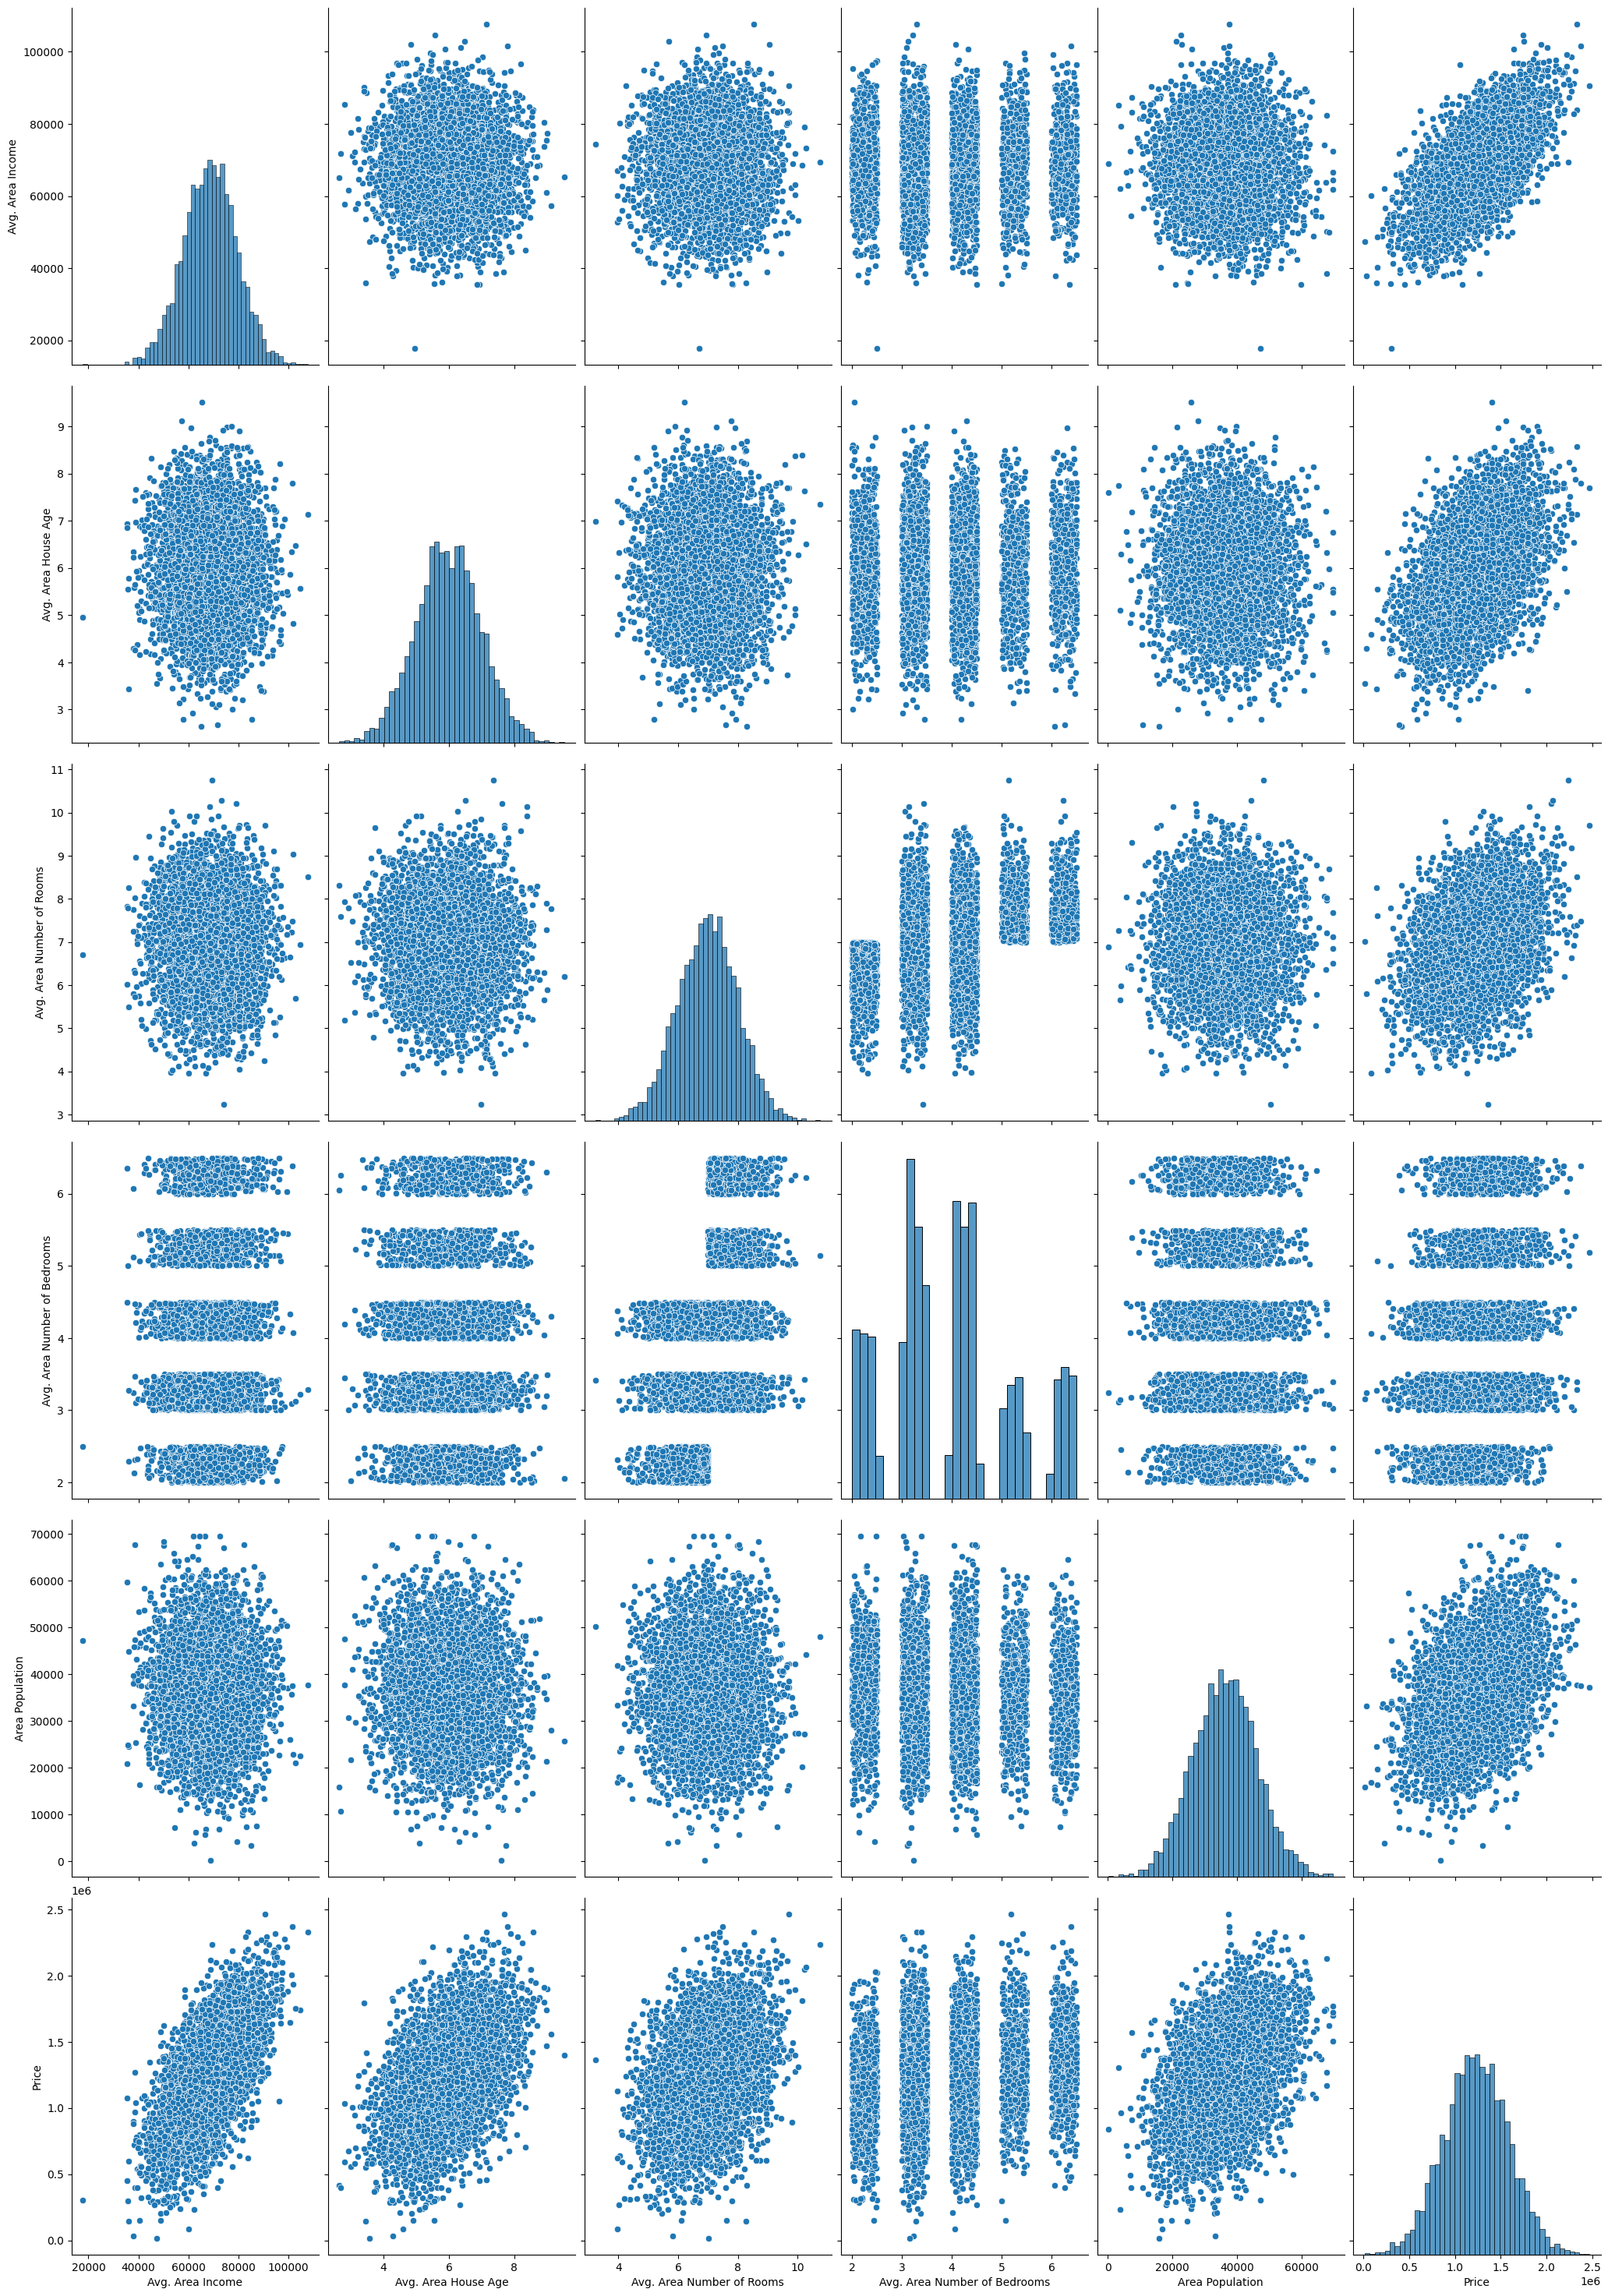

In [8]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(data, height=5, aspect=0.7)

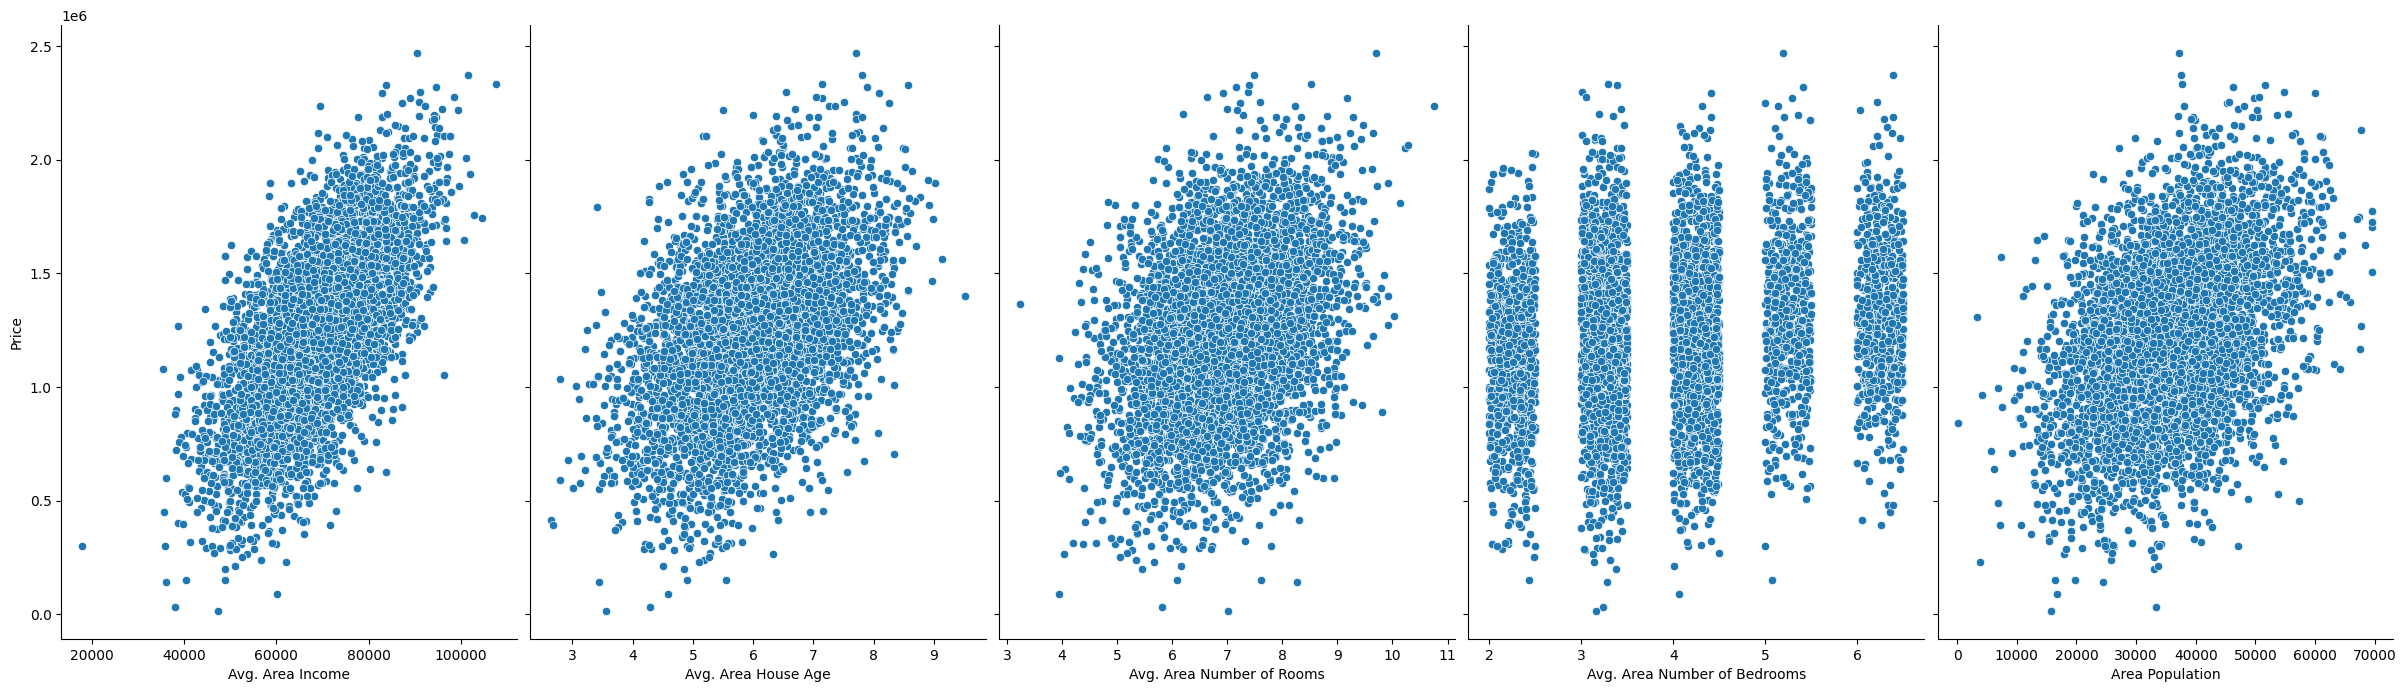

In [10]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=7, aspect=0.7, kind='scatter')

<Axes: >

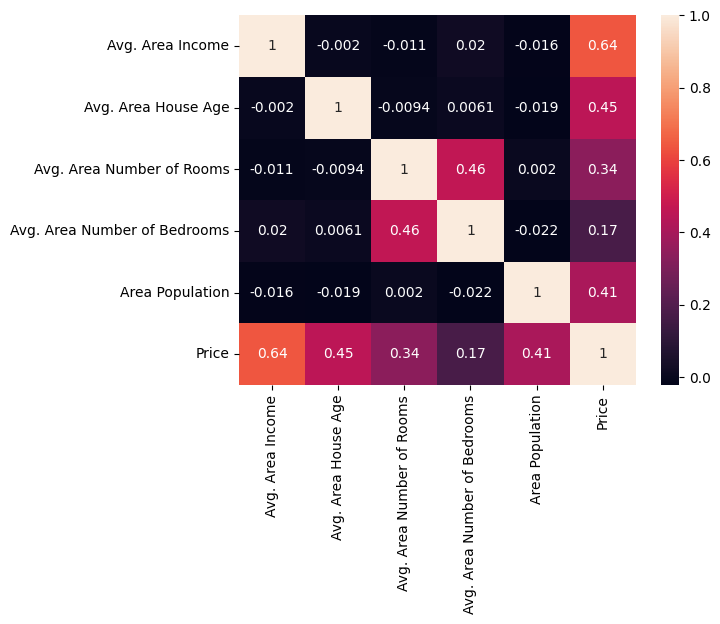

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

/var/folders/ts/t0y8j7tn61v2qmfqjwmswtmm0000gn/T/ipykernel_6866/4244922584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

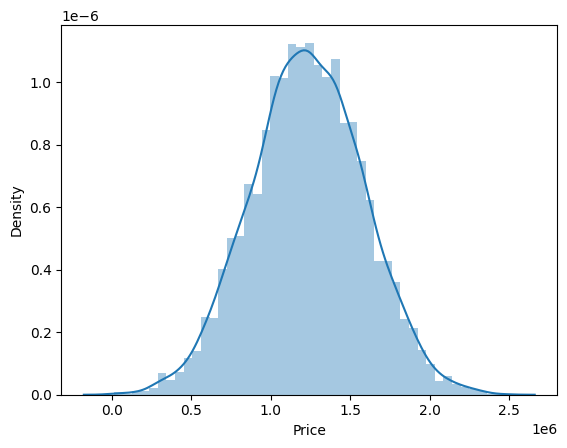

In [13]:
sns.distplot(data.Price)

In [19]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [20]:
# Putting feature variable to X
X = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

# Putting response variable to y
y = data['Price']

In [21]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [22]:
X.head()

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [23]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [24]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [26]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

In [28]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [29]:
# fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
# print the intercept
print(lm.intercept_)

1231006.3190642651


In [31]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
0,229275.224032
1,163592.487140
2,120113.253351
3,3015.847572
4,150556.340296


In [32]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [34]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9831074697.74044
r_square_value : 0.9199287959786013


In [35]:
from math import sqrt

rms = sqrt(mse)
rms

99151.77606952102

Text(0, 0.5, 'Housing Price')

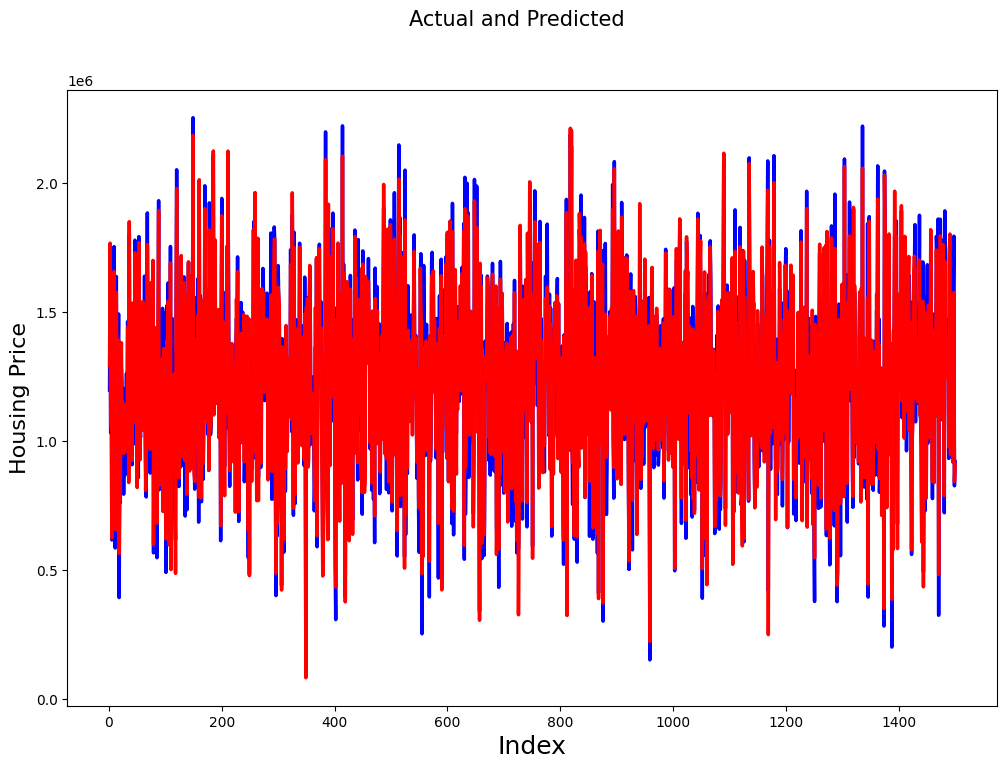

In [36]:
# Actual and Predicted
c = [i for i in range(1,1501,1)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label